### Logistic Regression
If I have certain proprieties of x, how do I classify it as x and not y?
Thus we need a hypothesis between 0 and 1
For this we can use a sigmoid function
$$
g(z) = \frac{1}{1 + e^{-z}}
$$
Where z could be $\Theta^{T}x$
Then:
$$
h_{\Theta}(x) = g(\Theta^{T}x) = \frac{1}{1 + e^{-\Theta^{T}x}}
$$
Where:
$$
h(x) = 
\begin{cases}
1, & h(x) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$
Now the Cost function should also change (Binary Cross-Entropy Loss)
$$
J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} ({Cost(h_{\Theta}(x),y)})
$$
$$
Cost(h_{\Theta}(x),y) = -y ln(h_{\Theta}(x)) - (1 - y)(ln(1 - h_{\Theta}(x)))
$$
This makes sense because from fig.2 when $h_{\Theta}(x)$ is high, the cost is low, meaning more the similarity to x, the cost for classifying it is low<br>
Note that the $h_{\Theta}(x)$ could also be non-linear, meaning $g(\Theta_{0} + \Theta_{1}{x_{1}}+...)$, forming cirlce

When having more classes to classify, we select only 2 class, one as the known and all other, perform the logistic regression and at the end that the classifier that minimize $h_{\Theta}(x)$

In [34]:
import numpy as np

class LogisticRegressionA:
    def __init__(self, alpha=0.01, iter=1000):
        self.alpha = alpha
        self.iter = iter
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self,y,y_pred):
        eps = 1e-15
        # Crop the values outside eps and 1-eps
        y_pred = np.clip(y_pred,eps,1 - eps)
        return -np.mean(y*np.log(y_pred) + (1-y)*(np.log(1-y_pred)))


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iter):
            linear_model = np.dot(X, self.w) + self.b
            y_predicted = self.sigmoid(linear_model)

            # gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.w -= self.alpha * dw
            self.b -= self.b * db

            loss = self.loss(y,y_pred=y_predicted)
            self.losses.append(loss)

    def predict_proba(self, X):
        thetaX = np.dot(X, self.w) + self.b
        return self.sigmoid(thetaX)

    def predict(self, X, threshold=0.5):
        y_predicted = self.predict_proba(X)
        return np.where(y_predicted >= threshold, 1, 0)


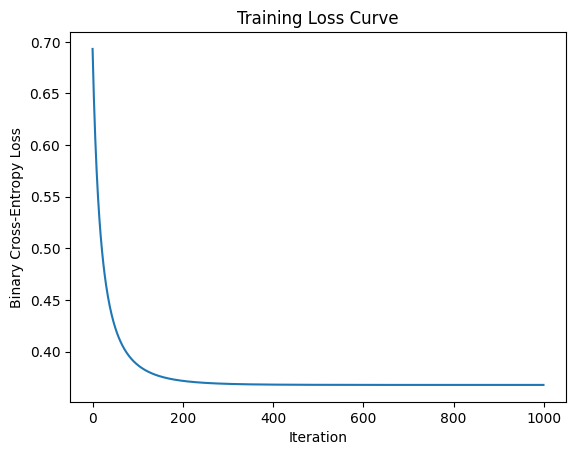

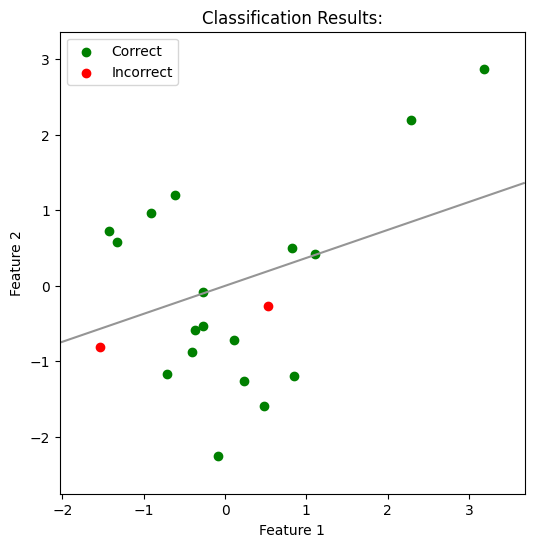

Accuracy: 0.9


In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Generate random features for 2 classes
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=50
)
# Divide the data into points
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LogisticRegressionA(alpha=0.1,iter=1000)
model.fit(X_train,y_train)
prediction = model.predict(X_test,0.5)

# Loss curve
plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

def plot_classification_results(model,X, y, y_pred,threshold=0.5):
    correct = y_pred == y
    incorrect = ~correct

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(X[correct, 0], X[correct, 1], c='green', label='Correct')
    plt.scatter(X[incorrect, 0], X[incorrect, 1], c='red', label='Incorrect')
    # Decision boundary
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid).reshape(xx.shape)
    plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Classification Results:")
    plt.show()
plot_classification_results(model,X_test, y_test,prediction)
print("Accuracy:", accuracy_score(y_test, prediction))

Test Accuracy: 0.75


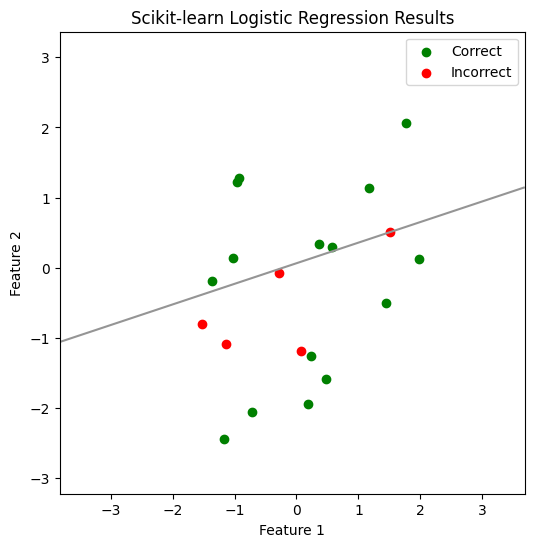

In [42]:
# With scikit-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=50
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='lbfgs')  # default solver
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(X_test[y_test==y_pred, 0], X_test[y_test==y_pred, 1], c='green', label='Correct')
plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], c='red', label='Incorrect')

# Decision boundary
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Scikit-learn Logistic Regression Results")
plt.show()